In [21]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
%matplotlib inline

pd.set_option('display.width', 1500)
pd.set_option('display.max_columns', 100)

from sklearn.model_selection import learning_curve


-------------

# Introduction au Dataset Spam

Nous allons travailler avec un jeu de données de courriers indésirables. Le jeu de données a 57 prédicteurs avec une variable de réponse appelée `Spam` qui indique si un email est un spam ou non. L'objectif est de pouvoir créer un classificateur ou une méthode qui agit comme un filtre anti-spam.

In [22]:
#Import Dataframe and Set Column Names
spam_df = pd.read_csv('spam.csv')
spam_df

,spam,testid,make,address,all,3d,our,over,remove,internet,order,mail,receive,will,people,report,addresses,free,business,email,you,credit,your,font,000,money,hp,hpl,george,650,lab,labs,telnet,857,data,415,85,technology,1999,parts,pm,direct,cs,meeting,original,project,re,edu,table,conference,ch;,ch(,ch[,ch!,ch$,ch#,crl.ave,crl.long,crl.tot
0,True,True,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,1.29,1.93,0.00,0.96,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278
1,True,False,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028
2,True,True,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.00,0.06,0.06,0.0,0.0,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259
3,True,False,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191
4,True,False,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,False,False,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,0.00,1.88,0.00,0.00,0.00,0.00,0.00,0.00,0.62,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.31,0.31,0.31,0.0,0.0,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88
4597,False,False,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,6.00,0.00,2.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,2.00,0.0,0.0,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14
4598,False,False,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.80,0.30,0.00,0.00,0.00,0.00,0.90,1.50,0.00,0.30,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,1.20,0.0,0.0,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118
4599,False,False,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.32,0.00,0.00,0.00,0.00,0.00,0.00,1.93,0.00,0.32,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.32,0.00,0.32,0.0,0.0,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78


## Exploration des Données

In [23]:
spam_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 59 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   spam        4601 non-null   bool   
 1   testid      4601 non-null   bool   
 2   make        4601 non-null   float64
 3   address     4601 non-null   float64
 4   all         4601 non-null   float64
 5   3d          4601 non-null   float64
 6   our         4601 non-null   float64
 7   over        4601 non-null   float64
 8   remove      4601 non-null   float64
 9   internet    4601 non-null   float64
 10  order       4601 non-null   float64
 11  mail        4601 non-null   float64
 12  receive     4601 non-null   float64
 13  will        4601 non-null   float64
 14  people      4601 non-null   float64
 15  report      4601 non-null   float64
 16  addresses   4601 non-null   float64
 17  free        4601 non-null   float64
 18  business    4601 non-null   float64
 19  email       4601 non-null  

Les variables prédictives sont toutes continues. Elles représentent certaines caractéristiques comme la fréquence du mot "`discount`". La spécification et la description exactes de chaque prédicteur peuvent être trouvées en ligne. De plus la variable "testid" n'est pas importante par conséquent doit être supprimée.

In [24]:
spam_df.drop('testid', axis=1, inplace=True)

In [25]:
print(spam_df.isna().sum().sum())

0


Le dataset ne contient pas de valeur manquante.

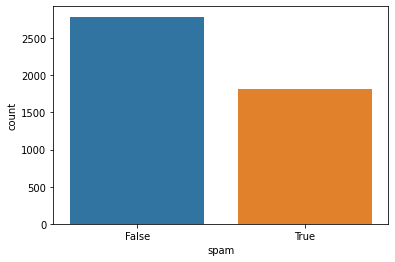

In [26]:
sns.countplot(x="spam", data=spam_df)
plt.savefig('repartition')
plt.show()

On constate qu'il n'existe pas de déséquilibre entre les deux classes(les deux classes ont presque le même nombre d'échantillons).

In [10]:
# #Visualisation de la distribution des variables dans chaque sous population (swarmplot)

# df = pd.melt(spam_df,id_vars="spam",       
#                     var_name="variables",
#                     value_name='valeurs')

# plt.figure(figsize=(16,10))
# sns.swarmplot(x="variables", y="valeurs", hue="spam", data=df)
# plt.xticks(rotation=70)

## Modelisation
### Split train/test dataset

Le dataset est divisé en deux parties: 70% des données pour l'entrainement et les 30% restante pour l'évaluation des modèles.  

In [27]:
#Split data into train and test
np.random.seed(42)
msk = np.random.rand(len(spam_df)) <= 0.7
data_train = spam_df[msk]
data_test = spam_df[~msk]

#Split predictor and response columns
x_train, y_train = data_train.drop(['spam'], axis=1), data_train['spam']
x_test , y_test  = data_test.drop(['spam'] , axis=1), data_test['spam']

print("Shape of Training Set :",data_train.shape)
print("Shape of Testing Set :" ,data_test.shape)

Shape of Training Set : (3262, 58)
Shape of Testing Set : (1339, 58)


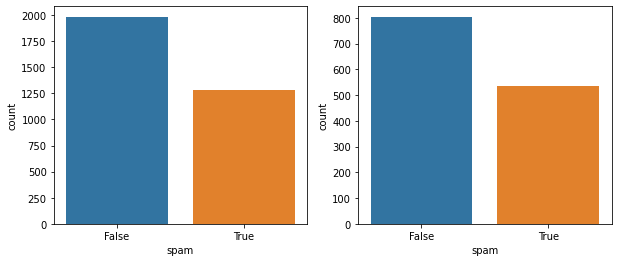

In [28]:
plt.figure(figsize=(10, 4))
plt.subplot(1,2,1)
sns.countplot(x='spam', data=data_train)
plt.subplot(1,2,2)
sns.countplot(x='spam', data=data_test)
plt.show()

On note que le nombre de cas de spam est représenté de manière à peu près égale dans le train et le test set.

In [29]:
# #Check Percentage of Spam in Train and Test Set
# percentage_spam_training = 100*y_train.sum()/len(y_train)
# percentage_spam_testing  = 100*y_test.sum()/len(y_test)
                                                  
# print("Percentage of Spam in Training Set \t : {:0.2f}%.".format(percentage_spam_training))
# print("Percentage of Spam in Testing Set \t : {:0.2f}%.".format(percentage_spam_testing))

-----------

# Ajustement d'un arbre de décision unique optimal (profondeur) :

Nous adaptons ici un seul arbre à notre ensemble de données de spam et effectuons une validation croisée (5-fold) sur le train set. Pour chaque profondeur de l'arbre, nous ajustons un arbre et calculons ensuite les scores de validation croisée à cinq reprises. Ces scores sont ensuite moyennés et comparés entre les différentes profondeurs. 

The best depth was found to be: 7


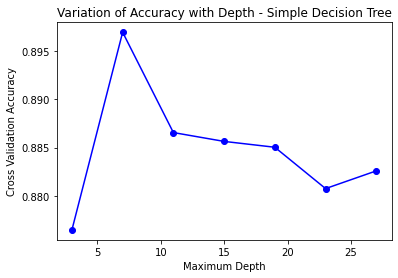

In [32]:
#Find optimal depth of trees
mean_CV_acc = {}
all_CV_acc = {}
tree_depth_start, tree_depth_end, steps = 3, 31, 4
for i in range(tree_depth_start, tree_depth_end, steps):
    model = DecisionTreeClassifier(max_depth=i)
    score = cross_val_score(estimator=model, X=x_train, y=y_train, cv=5, n_jobs=-1)
    all_CV_acc[i] = score
    mean_CV_acc[i] = score.mean()

#Make best depth a variable
best_depth = sorted(mean_CV_acc, key=mean_CV_acc.get, reverse=True)[0]
print("The best depth was found to be:", best_depth)


#Plot
plt.ylabel("Cross Validation Accuracy")
plt.xlabel("Maximum Depth")
plt.title('Variation of Accuracy with Depth - Simple Decision Tree')
plt.plot(list(mean_CV_acc.keys()), list(mean_CV_acc.values()), 'b-', marker='o')
plt.show()


Comme nous pouvons le constater, la profondeur optimale est de 7.

Nous voulons obtenir l'intervalle de confiance de ces résultats en utilisant ``scores.std()`` et ``plt.fill_between()``.

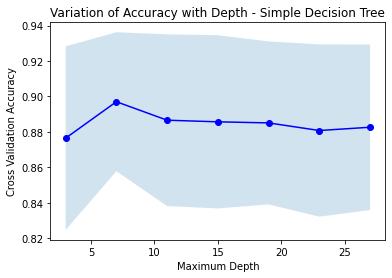

In [34]:
x = list(mean_CV_acc.keys())
y = list(mean_CV_acc.values())
lists = sorted(mean_CV_acc.items())
x, y = zip(*lists)   
stds = np.array([ np.std(score) for score in all_CV_acc.values() ])
plt.fill_between(x, y + stds, y - stds, alpha=0.2)

#Plot
plt.ylabel("Cross Validation Accuracy")
plt.xlabel("Maximum Depth")
plt.title('Variation of Accuracy with Depth - Simple Decision Tree')
plt.plot(x, y, 'b-', marker='o')
plt.show()

## Training et Evaluation du modèle avec cette profondeur

In [ ]:
#train model at the best depth
model_tree = DecisionTreeClassifier(max_depth=best_depth)
model_tree.fit(x_train, y_train)


#Check Accuracy of Spam Detection in Train and Test Set
print('Accuracy')
print("Simple Decision Trees: Accuracy, Training Set \t : {:.2%}".format(metrics.accuracy_score(y_train, model_tree.predict(x_train))))
print("Simple Decision Trees: Accuracy, Testing Set \t : {:.2%}".format(metrics.accuracy_score(y_test,  model_tree.predict(x_test))))
print('Precision')
print("Simple Decision Trees: precision, Training Set \t : {:.2%}".format(metrics.precision_score(y_train, model_tree.predict(x_train))))
print("Simple Decision Trees: precision, Testing Set \t : {:.2%}".format(metrics.precision_score(y_test,  model_tree.predict(x_test))))
print('Recall')
print("Simple Decision Trees: Recall, Training Set \t : {:.2%}".format(metrics.recall_score(y_train, model_tree.predict(x_train))))
print("Simple Decision Trees: Recall, Testing Set \t : {:.2%}".format(metrics.recall_score(y_test,  model_tree.predict(x_test))))

Accuracy
Simple Decision Trees: Accuracy, Training Set 	 : 94.39%
Simple Decision Trees: Accuracy, Testing Set 	 : 90.81%
Precision
Simple Decision Trees: precision, Training Set 	 : 95.06%
Simple Decision Trees: precision, Testing Set 	 : 90.87%
Recall
Simple Decision Trees: Recall, Training Set 	 : 90.38%
Simple Decision Trees: Recall, Testing Set 	 : 85.61%


In [ ]:
#Get Performance by Class (Lookup Confusion Matrix)
def confusionmatrix_rocauc(model, nom_model):
  """
  """
  plt.figure(figsize=(10, 4))
  plt.subplot(121)
  sns.heatmap(pd.crosstab(y_test, model.predict(x_test),
                          rownames=['Actual'], colnames=['Predicted']), annot=True, cbar=False, fmt='d')
  plt.title('confusion matrix: '+nom_model)
  plt.subplot(122)
  fpr, tpr, threshold = metrics.roc_curve(y_test, model.predict(x_test))

  plt.title('Receiver Operating Characteristic')
  plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % metrics.auc(fpr, tpr))
  plt.legend(loc = 'lower right')
  plt.plot([0, 1], [0, 1],'r--')
  plt.xlim([0, 1])
  plt.ylim([0, 1])
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.savefig('confu_roc_'+nom_model)
  plt.show()

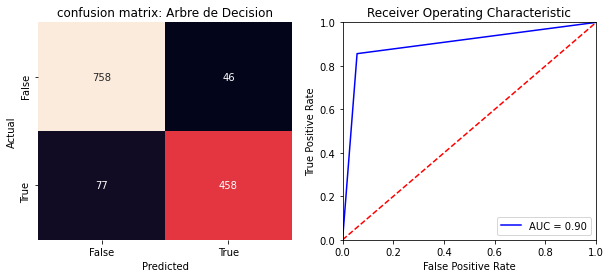

In [ ]:
model = model_tree
nom_model = 'Arbre de Decision'
confusionmatrix_rocauc(model, nom_model)


--------


# Bagging et Vote

#### Qu'est-ce que le bagging ?
  1. Bootstrapping : rééchantillonnage avec des remplacements pour obtenir différents ensembles de données et construire différents modèles.
  2. Faire quelque chose d'intelligent pour combiner les différents modèles.
  
Une façon d'ajuster la variance élevée des résultats d'une expérience est de réaliser l'expérience plusieurs fois, puis de faire la moyenne des résultats. 

 1. **Bootstrap:** nous générons de multiples échantillons de données de formation, via bootstrapping. Nous formons un arbre de décision complet sur chaque échantillon de données. 
 2. **Agrégation** : pour une entrée donnée, nous produisons la moyenne des sorties de tous les modèles pour cette entrée. 

-----------

Rééchantillonnons notre ensemble de données de formation pour créer plusieurs ensembles de données et adapter les modèles d'arbre décisionnel à chacun d'eux.

(Rééchantillonnage : nous avons montré en direct que différents échantillons donnent des résultats différents pour des choses comme les sommes, variant davantage lorsque les choses sur lesquelles nous additionnons ont elles-mêmes une variance élevée).

In [ ]:
# Stat on all data
data_train.mean(axis=0).to_frame('mean').T

,spam,make,address,all,3d,our,over,remove,internet,order,mail,receive,will,people,report,addresses,free,business,email,you,credit,your,font,000,money,hp,hpl,george,650,lab,labs,telnet,857,data,415,85,technology,1999,parts,pm,direct,cs,meeting,original,project,re,edu,table,conference,ch;,ch(,ch[,ch!,ch$,ch#,crl.ave,crl.long,crl.tot
mean,0.391784,0.105984,0.206603,0.284908,0.06607,0.309537,0.096462,0.11218,0.110368,0.088734,0.243182,0.062624,0.537961,0.096045,0.056395,0.049942,0.265929,0.139779,0.188832,1.691186,0.097235,0.81599,0.120224,0.097961,0.088694,0.528384,0.256327,0.776444,0.128697,0.097863,0.110806,0.064712,0.050377,0.102446,0.050635,0.112554,0.102541,0.135935,0.014834,0.081824,0.06897,0.039641,0.123467,0.045371,0.072471,0.308231,0.182955,0.005607,0.03191,0.036318,0.141634,0.018758,0.277636,0.071341,0.051376,5.300716,52.760883,278.253525


In [ ]:
data_train.sample(frac=1., replace=True).mean(axis=0).to_frame('mean').T

,spam,make,address,all,3d,our,over,remove,internet,order,mail,receive,will,people,report,addresses,free,business,email,you,credit,your,font,000,money,hp,hpl,george,650,lab,labs,telnet,857,data,415,85,technology,1999,parts,pm,direct,cs,meeting,original,project,re,edu,table,conference,ch;,ch(,ch[,ch!,ch$,ch#,crl.ave,crl.long,crl.tot
mean,0.40466,0.104448,0.161355,0.294344,0.067456,0.32092,0.096987,0.105046,0.105944,0.084644,0.228013,0.059608,0.516885,0.102486,0.057069,0.05095,0.263734,0.132005,0.19595,1.675405,0.089513,0.833863,0.135383,0.090399,0.087262,0.541787,0.247376,0.865622,0.126174,0.101257,0.111714,0.073725,0.065074,0.097719,0.065071,0.123697,0.11088,0.13153,0.020055,0.074323,0.081622,0.040028,0.122039,0.045699,0.07134,0.296125,0.212872,0.004546,0.029997,0.035479,0.144666,0.018911,0.281237,0.076012,0.047938,4.76848,51.653587,278.843654


On constate que l'échantillon est représentatif des données si on se base sur la moyenne. Maintenant, nous ajustons réellement les échantillons.

In [ ]:
n_trees = 100 # we tried a variety of numbers here
choosen_depth = 5

In [ ]:
#Creating model
np.random.seed(0)
bagvot = DecisionTreeClassifier(max_depth=choosen_depth)

#Initializing variables
predictions_train = np.zeros((data_train.shape[0], n_trees))
predictions_test = np.zeros((data_test.shape[0], n_trees))

#Conduct bootstraping iterations
for i in range(n_trees):
    temp = data_train.sample(frac=1, replace=True)
    response_variable = temp['spam']
    temp = temp.drop(['spam'], axis=1)
    
    bagvot.fit(temp, response_variable)  
    predictions_train[:,i] = bagvot.predict(x_train)   
    predictions_test[:,i] = bagvot.predict(x_test)
    
#Make Predictions Dataframe
columns = ["Bootstrap-Model_"+str(i+1) for i in range(n_trees)]
predictions_train = pd.DataFrame(predictions_train, columns=columns)
predictions_test = pd.DataFrame(predictions_test, columns=columns)

In [ ]:
## Example Bolean for locating the Non Spam
# y == 0
## Example Bolean for locating the Spam
# y == 1

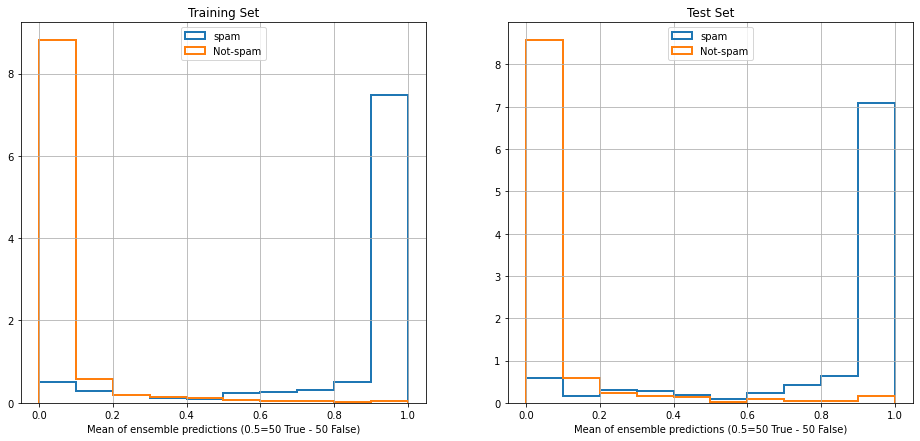

In [ ]:
num_to_avg = 100
fig, axs = plt.subplots(1, 2, figsize=(16, 7))
for (ax, label, predictions, y) in [
    (axs[0], 'Training Set', predictions_train, y_train.values), 
    (axs[1], 'Test Set' , predictions_test , y_test.values) ]:
    
    # Take the average
    mean_predictions = predictions.iloc[:,:num_to_avg].mean(axis=1)
    
    # Plot the Spam
    mean_predictions[y == 1].hist(density=True, histtype='step', 
                                  range=[0,1], label='spam', lw=2, ax=ax)
    
    # Plot the non Spam
    mean_predictions[y == 0].hist(density=True, histtype='step', 
                                  range=[0,1], label='Not-spam', lw=2, ax=ax)
    ax.legend(loc='upper center');
    ax.set_xlabel("Mean of ensemble predictions (0.5=50 True - 50 False)")
    ax.set_title(label)


Et maintenant, les prédictions finales avec le vote à la majorité.

In [ ]:
#Function to ensemble the prediction of each bagged decision tree model
def get_prediction(df, count=-1):
    count = df.shape[1] if count==-1 else count
    temp = df.iloc[:,0:count]
    return np.mean(temp, axis=1)>0.5

#Check Accuracy of Spam Detection in Train and Test Set
print('Accuracy')
print("Bagging vote: Accuracy, Training Set \t : {:.2%}".format(metrics.accuracy_score(y_train, get_prediction(predictions_train, count=-1))))
print("Bagging vote: Accuracy, Testing Set \t : {:.2%}".format(metrics.accuracy_score(y_test,  get_prediction(predictions_test, count=-1))))
print('Precision')
print("Bagging vote: precision, Training Set \t : {:.2%}".format(metrics.precision_score(y_train,get_prediction(predictions_train, count=-1))))
print("Bagging vote: precision, Testing Set \t : {:.2%}".format(metrics.precision_score(y_test,  get_prediction(predictions_test, count=-1))))
print('Recall')
print("Bagging vote: Recall, Training Set \t : {:.2%}".format(metrics.recall_score(y_train, get_prediction(predictions_train, count=-1))))
print("Bagging vote: Recall, Testing Set \t : {:.2%}".format(metrics.recall_score(y_test,  get_prediction(predictions_test, count=-1))))

Accuracy
Bagging vote: Accuracy, Training Set 	 : 94.11%
Bagging vote: Accuracy, Testing Set 	 : 92.01%
Precision
Bagging vote: precision, Training Set 	 : 96.65%
Bagging vote: precision, Testing Set 	 : 94.58%
Recall
Bagging vote: Recall, Training Set 	 : 88.03%
Bagging vote: Recall, Testing Set 	 : 84.86%


Count dans le code ci-dessus peut être utilisé pour définir le nombre de modèles sur lesquels le vote dans le dataframe doit être basé.

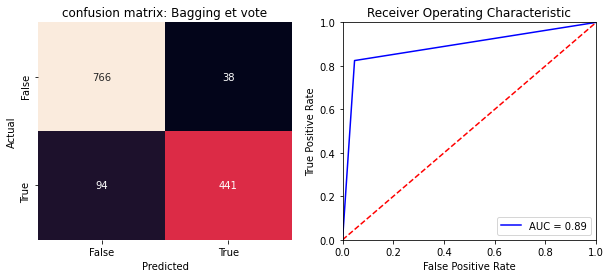

In [ ]:
#Get Performance by Class (Lookup Confusion Matrix)
model = bagvot
nom_model = 'Bagging et vote'
confusionmatrix_rocauc(model, nom_model)

# Random Forest vs Bagging

#### Qu'est-ce qu'une forêt aléatoire ? 

- **Plusieurs arbres** forment une **forêt**.
- **Plusieurs arbres aléatoires** forment une **forêt aléatoire**.


La forêt aléatoire est une forme modifiée de bagging qui crée des ensembles d'arbres de décision indépendants. 
Pour *décorréler les arbres*, nous.. : 
1. entraînons chaque arbre sur un échantillon bootstrap **aléatoire** distinct de l'ensemble d'entraînement complet (comme pour le bagging). 
2. pour chaque arbre, à chaque split, nous **sélectionnons aléatoirement un ensemble de 𝐽′ prédicteurs à partir de l'ensemble complet de prédicteurs** (ce qui n'est pas fait dans le bagging).
3. Parmi les 𝐽′ prédicteurs, nous sélectionnons le prédicteur optimal et le seuil optimal correspondant pour le split. 

Maintenant, nous allons adapter une méthode d'ensemble, la technique Random Forest, qui est différente de l'arbre de décision. Utilisons ``n_estimators = predictor_count/2`` et ``max_depth = best_depth``.

In [ ]:
#Fit a Random Forest Model

#Training
rfc = RandomForestClassifier(n_estimators=50, max_depth=best_depth, random_state=50)
rfc.fit(x_train, y_train)

#Check Accuracy of Spam Detection in Train and Test Set
print('Accuracy')
print("Random Forest: Accuracy, Training Set \t : {:.2%}".format(metrics.accuracy_score(y_train, rfc.predict(x_train))))
print("Random Forest: Accuracy, Testing Set \t : {:.2%}".format(metrics.accuracy_score(y_test,  rfc.predict(x_test))))
print('Precision')
print("Random Forest: precision, Training Set \t : {:.2%}".format(metrics.precision_score(y_train, rfc.predict(x_train))))
print("Random Forest: precision, Testing Set \t : {:.2%}".format(metrics.precision_score(y_test,  rfc.predict(x_test))))
print('Recall')
print("Random Forest: Recall, Training Set \t : {:.2%}".format(metrics.recall_score(y_train, rfc.predict(x_train))))
print("Random Forest: Recall, Testing Set \t : {:.2%}".format(metrics.recall_score(y_test,  rfc.predict(x_test))))

Accuracy
Random Forest: Accuracy, Training Set 	 : 94.82%
Random Forest: Accuracy, Testing Set 	 : 93.28%
Precision
Random Forest: precision, Training Set 	 : 97.27%
Random Forest: precision, Testing Set 	 : 94.59%
Recall
Random Forest: Recall, Training Set 	 : 89.28%
Random Forest: Recall, Testing Set 	 : 88.22%


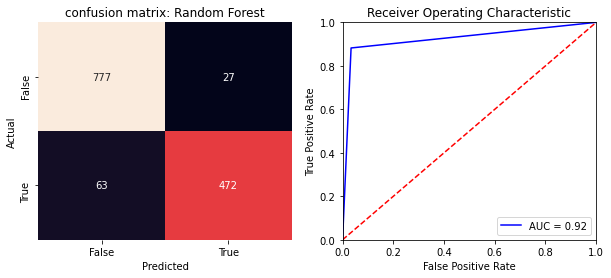

In [ ]:
model = rfc
nom_model = 'Random Forest'
confusionmatrix_rocauc(model, nom_model)

#### Comparons les performances de nos 3 modèles :

In [ ]:
#Check Accuracy of Spam Detection in Train and Test Set
print('Simple Decision Trees')
print("Simple Decision Trees: Accuracy, Testing Set \t : {:.2%}".format(metrics.accuracy_score(y_test,  model_tree.predict(x_test))))
print("Simple Decision Trees: precision, Testing Set \t : {:.2%}".format(metrics.precision_score(y_test,  model_tree.predict(x_test))))
print("Simple Decision Trees: Recall, Testing Set \t : {:.2%}".format(metrics.recall_score(y_test,  model_tree.predict(x_test))))
print('Bagging vote')
print("Bagging vote: Accuracy, Testing Set \t : {:.2%}".format(metrics.accuracy_score(y_test,  get_prediction(predictions_test, count=-1))))
print("Bagging vote: precision, Testing Set \t : {:.2%}".format(metrics.precision_score(y_test,  get_prediction(predictions_test, count=-1))))
print("Bagging vote: Recall, Testing Set \t : {:.2%}".format(metrics.recall_score(y_test,  get_prediction(predictions_test, count=-1))))
print('Random Fores')
print("Random Forest: Accuracy, Testing Set \t : {:.2%}".format(metrics.accuracy_score(y_test,  rfc.predict(x_test))))
print("Random Forest: precision, Testing Set \t : {:.2%}".format(metrics.precision_score(y_test,  rfc.predict(x_test))))
print("Random Forest: Recall, Testing Set \t : {:.2%}".format(metrics.recall_score(y_test,  rfc.predict(x_test))))

Simple Decision Trees
Simple Decision Trees: Accuracy, Testing Set 	 : 90.81%
Simple Decision Trees: precision, Testing Set 	 : 90.87%
Simple Decision Trees: Recall, Testing Set 	 : 85.61%
Bagging vote
Bagging vote: Accuracy, Testing Set 	 : 92.01%
Bagging vote: precision, Testing Set 	 : 94.58%
Bagging vote: Recall, Testing Set 	 : 84.86%
Random Fores
Random Forest: Accuracy, Testing Set 	 : 93.28%
Random Forest: precision, Testing Set 	 : 94.59%
Random Forest: Recall, Testing Set 	 : 88.22%


#### Comme nous l'avons vu ci-dessus, les performances de la méthode Bagging et de la méthode Random Forest sont similaires, alors quelle est la différence ? Les deux méthodes surajoutent-elles les données autant l'une que l'autre ?

In [ ]:
#Fit a Random Forest Model

new_depth = best_depth + 20 

#Training
rfc_2 = RandomForestClassifier(n_estimators=50, max_depth=new_depth, random_state=50)
rfc_2.fit(x_train, y_train)

#Check Accuracy of Spam Detection in Train and Test Set
print('Accuracy')
print("Random Forest Deep: Accuracy, Training Set \t : {:.2%}".format(metrics.accuracy_score(y_train, rfc_2.predict(x_train))))
print("Random Forest Deep: Accuracy, Testing Set \t : {:.2%}".format(metrics.accuracy_score(y_test,  rfc_2.predict(x_test))))
print('Precision')
print("Random Forest Deep: precision, Training Set \t : {:.2%}".format(metrics.precision_score(y_train, rfc_2.predict(x_train))))
print("Random Forest Deep: precision, Testing Set \t : {:.2%}".format(metrics.precision_score(y_test,  rfc_2.predict(x_test))))
print('Recall')
print("Random Forest Deep: Recall, Training Set \t : {:.2%}".format(metrics.recall_score(y_train, rfc_2.predict(x_train))))
print("Random Forest Deep: Recall, Testing Set \t : {:.2%}".format(metrics.recall_score(y_test,  rfc_2.predict(x_test))))

Accuracy
Random Forest Deep: Accuracy, Training Set 	 : 99.85%
Random Forest Deep: Accuracy, Testing Set 	 : 95.37%
Precision
Random Forest Deep: precision, Training Set 	 : 99.92%
Random Forest Deep: precision, Testing Set 	 : 96.10%
Recall
Random Forest Deep: Recall, Training Set 	 : 99.69%
Random Forest Deep: Recall, Testing Set 	 : 92.15%


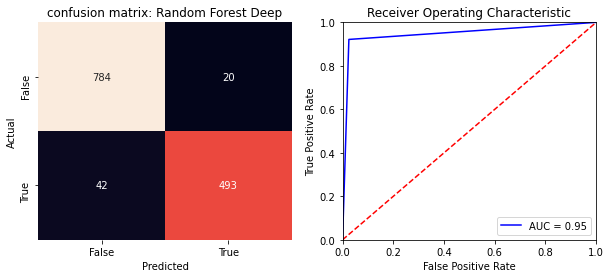

In [ ]:
model = rfc_2
nom_model = 'Random Forest Deep'
confusionmatrix_rocauc(model, nom_model)

#### Metrics comparaison(Test):

In [ ]:
#Check Accuracy of Spam Detection in Train and Test Set
print('Simple Decision Trees')
print("Simple Decision Trees: Accuracy, Testing Set \t : {:.2%}".format(metrics.accuracy_score(y_test,  model_tree.predict(x_test))))
print("Simple Decision Trees: precision, Testing Set \t : {:.2%}".format(metrics.precision_score(y_test,  model_tree.predict(x_test))))
print("Simple Decision Trees: Recall, Testing Set \t : {:.2%}".format(metrics.recall_score(y_test,  model_tree.predict(x_test))))
print('Bagging vote')
print("Bagging vote: Accuracy, Testing Set \t : {:.2%}".format(metrics.accuracy_score(y_test,  get_prediction(predictions_test, count=-1))))
print("Bagging vote: precision, Testing Set \t : {:.2%}".format(metrics.precision_score(y_test,  get_prediction(predictions_test, count=-1))))
print("Bagging vote: Recall, Testing Set \t : {:.2%}".format(metrics.recall_score(y_test,  get_prediction(predictions_test, count=-1))))
print('Random Forest')
print("Random Forest: Accuracy, Testing Set \t : {:.2%}".format(metrics.accuracy_score(y_test,  rfc.predict(x_test))))
print("Random Forest: precision, Testing Set \t : {:.2%}".format(metrics.precision_score(y_test,  rfc.predict(x_test))))
print("Random Forest: Recall, Testing Set \t : {:.2%}".format(metrics.recall_score(y_test,  rfc.predict(x_test))))
print('Random Forest Deep')
print("Random Forest Deep: Accuracy, Testing Set \t : {:.2%}".format(metrics.accuracy_score(y_test,  rfc_2.predict(x_test))))
print("Random Forest Deep: precision, Testing Set \t : {:.2%}".format(metrics.precision_score(y_test,  rfc_2.predict(x_test))))
print("Random Forest Deep: Recall, Testing Set \t : {:.2%}".format(metrics.recall_score(y_test,  rfc_2.predict(x_test))))

Simple Decision Trees
Simple Decision Trees: Accuracy, Testing Set 	 : 90.81%
Simple Decision Trees: precision, Testing Set 	 : 90.87%
Simple Decision Trees: Recall, Testing Set 	 : 85.61%
Bagging vote
Bagging vote: Accuracy, Testing Set 	 : 92.01%
Bagging vote: precision, Testing Set 	 : 94.58%
Bagging vote: Recall, Testing Set 	 : 84.86%
Random Forest
Random Forest: Accuracy, Testing Set 	 : 93.28%
Random Forest: precision, Testing Set 	 : 94.59%
Random Forest: Recall, Testing Set 	 : 88.22%
Random Forest Deep
Random Forest Deep: Accuracy, Testing Set 	 : 95.37%
Random Forest Deep: precision, Testing Set 	 : 96.10%
Random Forest Deep: Recall, Testing Set 	 : 92.15%


#### Importance des caractéristiques
Random Forest donne les valeurs ci-dessus en tant que ``feature_importance`` où il normalise l'impact d'un prédicteur au nombre de fois qu'il est utile et donne ainsi une importance supérieure gratuitement. Explorez les attributs de l'objet du modèle Random Forest pour trouver les meilleurs nœuds.

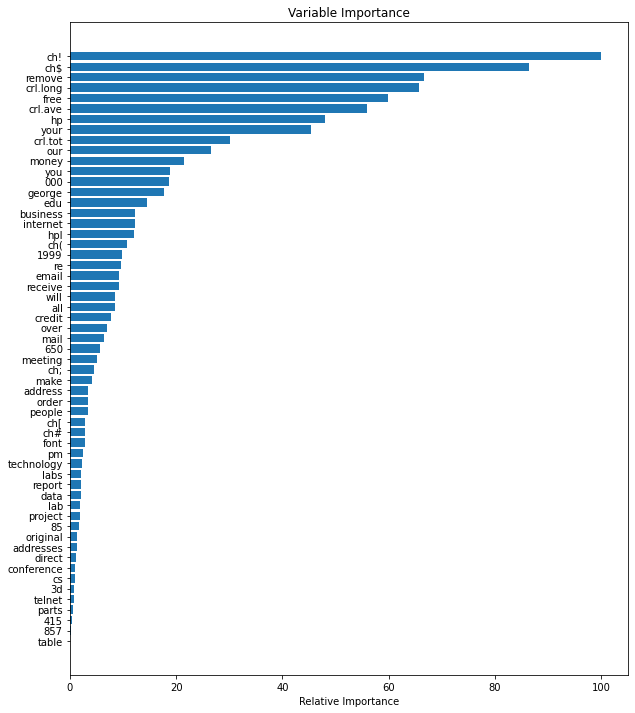

In [ ]:
#Top Features
feature_importance = rfc_2.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

#Plot
plt.figure(figsize=(10,12))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, x_train.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

____________

## Les limites de la forêt aléatoire

#### La forêt aléatoire peut overfitter
- L'augmentation du nombre d'arbres dans la RF n'augmente généralement pas le risque d'overfitting, MAIS si le nombre d'arbres dans l'ensemble est trop important, les arbres de l'ensemble peuvent devenir corrélés, et donc augmenter la variance.

#### Le Random Forest peut échouer

- **Quand nous avons beaucoup de prédicteurs qui sont complètement indépendants de la réponse et un prédicteur qui a une influence écrasante**.

____________

## Bagging et random forest vs. Boosting

- **Bagging et Random Forest:**
  - les arbres complexes et profonds **overfittent**
  - donc **réduisons la variance sur les arbres complexes**.
- **Boosting:** 
  - arbres simples et peu profonds **underfittent** 
  - donc **réalisons une réduction de biais sur les arbres simples** !
  - rendre les arbres simples plus précis !
  
Le **boosting** tente d'améliorer la flexibilité prédictive des modèles simples.
 - Il entraîne un **grand nombre d'apprenants "faibles" en séquence**.
 - Un apprenant faible est un modèle contraint (limite la profondeur maximale de chaque arbre de décision).
 - Chaque modèle de la séquence se concentre sur **l'apprentissage à partir des erreurs** de celui qui le précède.
 - En pondérant plus fortement les erreurs dans l'arbre suivant, notre arbre suivant apprendra de ces erreurs.
 - Une combinaison de tous les apprenants faibles en un seul apprenant fort = **un arbre boosté**.

## Utilisez la méthode Adaboost pour visualiser le compromis Bias-Variance.

In [ ]:
#Training
adaboost = AdaBoostClassifier(base_estimator= DecisionTreeClassifier(max_depth=3), 
                           n_estimators=500, 
                           learning_rate=0.05, random_state=42)
adaboost.fit(x_train, y_train)

#Check Accuracy of Spam Detection in Train and Test Set
print('Accuracy')
print("Adaboost: Accuracy, Training Set \t : {:.2%}".format(metrics.accuracy_score(y_train, adaboost.predict(x_train))))
print("Adaboost: Accuracy, Testing Set \t : {:.2%}".format(metrics.accuracy_score(y_test,  adaboost.predict(x_test))))
print('Precision')
print("Adaboost: precision, Training Set \t : {:.2%}".format(metrics.precision_score(y_train, adaboost.predict(x_train))))
print("Adaboost: precision, Testing Set \t : {:.2%}".format(metrics.precision_score(y_test,  adaboost.predict(x_test))))
print('Recall')
print("Adaboost: Recall, Training Set \t : {:.2%}".format(metrics.recall_score(y_train, adaboost.predict(x_train))))
print("Adaboost: Recall, Testing Set \t : {:.2%}".format(metrics.recall_score(y_test,  adaboost.predict(x_test))))

Accuracy
Adaboost: Accuracy, Training Set 	 : 99.72%
Adaboost: Accuracy, Testing Set 	 : 95.07%
Precision
Adaboost: precision, Training Set 	 : 99.84%
Adaboost: precision, Testing Set 	 : 95.36%
Recall
Adaboost: Recall, Training Set 	 : 99.45%
Adaboost: Recall, Testing Set 	 : 92.15%


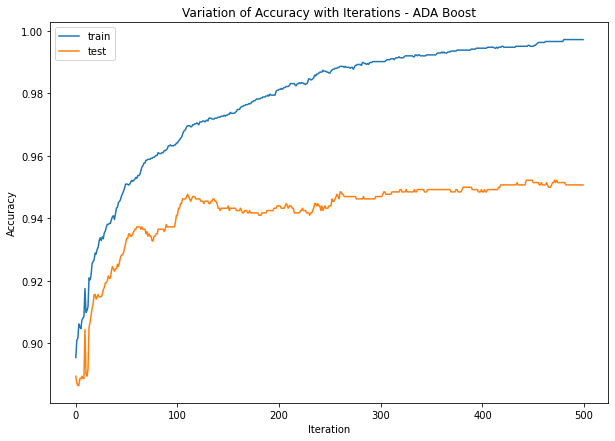

In [ ]:
#Plot Iteration based score
train_scores = list(adaboost.staged_score(x_train,y_train))
test_scores = list(adaboost.staged_score(x_test, y_test))

plt.figure(figsize=(10,7))
plt.plot(train_scores,label='train')
plt.plot(test_scores,label='test')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title("Variation of Accuracy with Iterations - ADA Boost")
plt.legend();

In [ ]:
#Training
adaboost = AdaBoostClassifier(base_estimator= DecisionTreeClassifier(max_depth=3), 
                           n_estimators=120, 
                           learning_rate=0.05, random_state=42)
adaboost.fit(x_train, y_train)

#Check Accuracy of Spam Detection in Train and Test Set
print('Accuracy')
print("Adaboost: Accuracy, Training Set \t : {:.2%}".format(metrics.accuracy_score(y_train, adaboost.predict(x_train))))
print("Adaboost: Accuracy, Testing Set \t : {:.2%}".format(metrics.accuracy_score(y_test,  adaboost.predict(x_test))))
print('Precision')
print("Adaboost: precision, Training Set \t : {:.2%}".format(metrics.precision_score(y_train, adaboost.predict(x_train))))
print("Adaboost: precision, Testing Set \t : {:.2%}".format(metrics.precision_score(y_test,  adaboost.predict(x_test))))
print('Recall')
print("Adaboost: Recall, Training Set \t : {:.2%}".format(metrics.recall_score(y_train, adaboost.predict(x_train))))
print("Adaboost: Recall, Testing Set \t : {:.2%}".format(metrics.recall_score(y_test,  adaboost.predict(x_test))))

Accuracy
Adaboost: Accuracy, Training Set 	 : 97.06%
Adaboost: Accuracy, Testing Set 	 : 94.62%
Precision
Adaboost: precision, Training Set 	 : 97.28%
Adaboost: precision, Testing Set 	 : 95.13%
Recall
Adaboost: Recall, Training Set 	 : 95.15%
Adaboost: Recall, Testing Set 	 : 91.21%


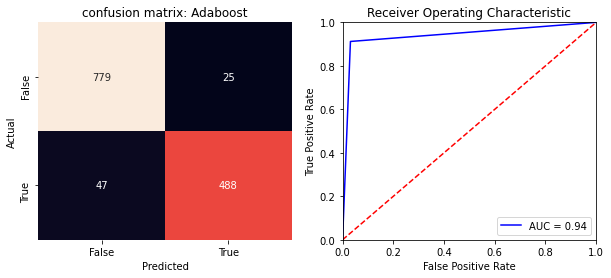

In [ ]:
model = adaboost
nom_model = 'Adaboost'
confusionmatrix_rocauc(model, nom_model)

In [ ]:
#Check Accuracy of Spam Detection in Train and Test Set
print('Simple Decision Trees')
print("Simple Decision Trees: Accuracy, Testing Set \t : {:.2%}".format(metrics.accuracy_score(y_test,  model_tree.predict(x_test))))
print("Simple Decision Trees: precision, Testing Set \t : {:.2%}".format(metrics.precision_score(y_test,  model_tree.predict(x_test))))
print("Simple Decision Trees: Recall, Testing Set \t : {:.2%}".format(metrics.recall_score(y_test,  model_tree.predict(x_test))))
print('Bagging vote')
print("Bagging vote: Accuracy, Testing Set \t : {:.2%}".format(metrics.accuracy_score(y_test,  get_prediction(predictions_test, count=-1))))
print("Bagging vote: precision, Testing Set \t : {:.2%}".format(metrics.precision_score(y_test,  get_prediction(predictions_test, count=-1))))
print("Bagging vote: Recall, Testing Set \t : {:.2%}".format(metrics.recall_score(y_test,  get_prediction(predictions_test, count=-1))))
print('Random Forest Deep')
print("Random Forest Deep: Accuracy, Testing Set \t : {:.2%}".format(metrics.accuracy_score(y_test,  rfc_2.predict(x_test))))
print("Random Forest Deep: precision, Testing Set \t : {:.2%}".format(metrics.precision_score(y_test,  rfc_2.predict(x_test))))
print("Random Forest Deep: Recall, Testing Set \t : {:.2%}".format(metrics.recall_score(y_test,  rfc_2.predict(x_test))))
print('AdaBoost')
print("AdaBoost: Accuracy, Testing Set \t : {:.2%}".format(metrics.accuracy_score(y_test,  adaboost.predict(x_test))))
print("AdaBoost: precision, Testing Set \t : {:.2%}".format(metrics.precision_score(y_test,  adaboost.predict(x_test))))
print("AdaBoost: Recall, Testing Set \t : {:.2%}".format(metrics.recall_score(y_test,  adaboost.predict(x_test))))

Simple Decision Trees
Simple Decision Trees: Accuracy, Testing Set 	 : 90.81%
Simple Decision Trees: precision, Testing Set 	 : 90.87%
Simple Decision Trees: Recall, Testing Set 	 : 85.61%
Bagging vote
Bagging vote: Accuracy, Testing Set 	 : 92.01%
Bagging vote: precision, Testing Set 	 : 94.58%
Bagging vote: Recall, Testing Set 	 : 84.86%
Random Forest Deep
Random Forest Deep: Accuracy, Testing Set 	 : 95.37%
Random Forest Deep: precision, Testing Set 	 : 96.10%
Random Forest Deep: Recall, Testing Set 	 : 92.15%
AdaBoost
AdaBoost: Accuracy, Testing Set 	 : 94.62%
AdaBoost: precision, Testing Set 	 : 95.13%
AdaBoost: Recall, Testing Set 	 : 91.21%


Random Forest et AdaBoost semblent être plus performant que les arbres de décision simples et le Bagging. De plus ils ont une performance similaire en termes de précision sur l'ensemble de données test.

#### Et si nous modifions la profondeur de nos arbres AdaBoost ?

In [ ]:
! pip install tqdm
from tqdm import tqdm
import time

In [ ]:
# Start Timer
start = time.time()


#Find Optimal Depth of trees for Boosting
score_train, score_test, depth_start, depth_end = {}, {}, 2, 30
for i in tqdm(range(depth_start, depth_end, 2)):
    ada = AdaBoostClassifier(
        base_estimator=DecisionTreeClassifier(max_depth=i),
        n_estimators=200, learning_rate=0.05, random_state=42)
    ada.fit(x_train, y_train)
    score_train[i] = accuracy_score(y_train, ada.predict(x_train))
    score_test[i] = accuracy_score(y_test, ada.predict(x_test))
    
# Stop Timer
end = time.time()
elapsed_adaboost = end - start

100%|██████████| 14/14 [01:44<00:00,  7.47s/it]


La complexité d'Adaboost dépend à la fois du nombre d'estimateurs et de l'estimateur de base. 
- Au début, lorsque la complexité de notre modèle augmente (profondeur 2-3), nous observons d'abord une petite augmentation de la précision.
- Mais au fur et à mesure que nous nous déplaçons vers la droite du graphique (arbres **plus profonds**), notre modèle **va overfitter les données**.


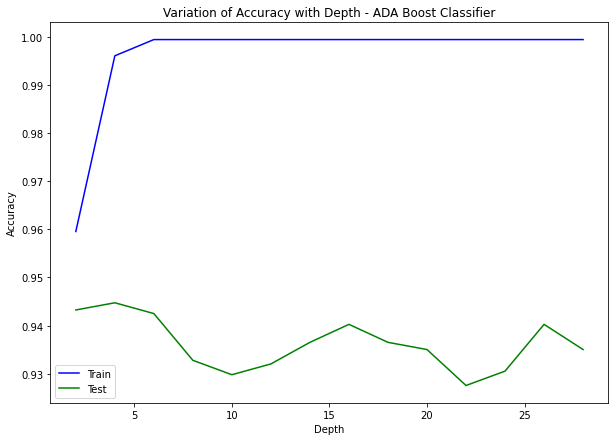

In [ ]:
#Plot
lists1 = sorted(score_train.items())
lists2 = sorted(score_test.items())
x1, y1 = zip(*lists1) 
x2, y2 = zip(*lists2) 
plt.figure(figsize=(10,7))
plt.ylabel("Accuracy")
plt.xlabel("Depth")
plt.title('Variation of Accuracy with Depth - ADA Boost Classifier')
plt.plot(x1, y1, 'b-', label='Train')
plt.plot(x2, y2, 'g-', label='Test')
plt.legend()
plt.show()

## Gradient Boosting et XGBoost


### Gradient Boosting ?

Pour améliorer ses prédictions, **le boosting de gradient examine la différence entre son approximation actuelle, et le vecteur cible correct connu, qui est appelé le résidu**.

Théorie :

- On peut supposer qu'il existe un modèle imparfait $F_{m}$. 
- L'algorithme de gradient boosting améliore le modèle $F_{m}$ en construisant un nouveau modèle qui ajoute un estimateur $h$ pour fournir un meilleur modèle : 
$$F_{m+1}(x)=F_{m}(x)+h(x)$$

- Pour trouver $h$, la solution de boosting de gradient commence par l'observation qu'un **h** parfait impliquerait

$$F_{m+1}(x)=F_{m}(x)+h(x)=y$$

- ou, de manière équivalente, en résolvant pour h,

$$h(x)=y-F_{m}(x)$$.

- Par conséquent, le gradient boosting ajustera h au résidu $y-F_{m}(x)$$.


----------

### XGBoost 
 - Basé sur le Gradient Boosting
 - XGBoost = **eXtreme Gradient Boosting** ; fait référence à l'objectif technique de repousser la limite des ressources de calcul pour l'algorithme d'arbre boosté.
 
**Accuracy:**
 - XGBoost utilise cependant une **formalisation de modèle plus régularisée pour contrôler l'overfitting** (=meilleure performance) par une régularisation L1 et L2.
 - Méthodes d'élagage de l'arbre : un arbre plus "superficiel" empêchera également l'overfitting.
 - Techniques de convergence améliorées (comme l'arrêt précoce lorsqu'aucune amélioration n'est apportée pendant un nombre X d'itérations).
 - Validation croisée intégrée
 
**Vitesse de calcul**
 - Structures de données spéciales de type vecteur et matrice pour des résultats plus rapides.
 - Construction d'arbre parallélisée : utilisation de tous les cœurs de notre CPU pendant l'apprentissage.
 - Calcul distribué : pour l'entraînement de très grands modèles en utilisant un cluster de machines.
 - Optimisation du cache des structures de données et de l'algorithme : pour utiliser au mieux le matériel.

**Arbres boostés en parallèle**
- Xgboost n'exécute pas plusieurs arbres en parallèle, nous avons besoin de prédictions après chaque arbre pour mettre à jour les gradients.
- Il effectue plutôt la parallélisation DANS un seul arbre en utilisant openMP pour créer des branches indépendamment.

## XGBoost

In [ ]:
# Let's install XGBoost
! pip install xgboost
! pip install optuna

In [ ]:
import xgboost as xgb
import optuna

In [ ]:
def objective(trial): 


  xgb_train = xgb.DMatrix(x_train.values, ((y_train)*1).values)
  xgb_test = xgb.DMatrix(x_test.values,  ((y_test)*1).values)   
  params = {
          'max_leaves': trial.suggest_int('max_leaves', 32, 512),
          'max_bin': trial.suggest_int('max_bin', 50, 900),
          'objective': 'multi:softprob',
          'num_class': 2,
          'eval_metric': 'mlogloss',
          'max_depth': trial.suggest_int('max_depth', 4, 16),
          'min_child_weight': trial.suggest_int('min_child_weight', 1, 16),
          'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
          'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
          'gamma':trial.suggest_uniform('gamma', 0.0, 1.0),
          'apha': trial.suggest_loguniform('apha', 1e-8, 1.0),
          'lambda': trial.suggest_loguniform('lambda', 1e-8, 1.0),
          'learning_rate': trial.suggest_uniform('learning_rate', 1e-3, 1.0),
          'seed': 42
          }

  model = xgb.train(params, xgb_train, evals=[(xgb_test, 'mlogloss')], verbose_eval=200, num_boost_round=1300,early_stopping_rounds=5)
  val_pred = model.predict(xgb.DMatrix(x_test.values))
  accuracy = accuracy_score(((y_test)*1).values, (val_pred).argmax(axis=1))
  print(f"accuracy = {accuracy}")
  return accuracy

In [ ]:
# Bayesian optimization
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

In [ ]:
print('Number of finished trials: {}'.format(len(study.trials)))

print('Best trial:')
trial = study.best_trial

print('  Value: {}'.format(trial.value))

print('  Params: ')
for key, value in trial.params.items():
    print('    {}: {}'.format(key, value))

Number of finished trials: 50
Best trial:
  Value: 0.9566840926064227
  Params: 
    max_leaves: 196
    max_bin: 612
    max_depth: 11
    min_child_weight: 5
    subsample: 0.9605037811738737
    colsample_bytree: 0.6815730664486106
    gamma: 0.4431430683145744
    apha: 8.015232565608437e-08
    lambda: 0.00019534903731830634
    learning_rate: 0.6940666857354592


In [ ]:
from optuna.visualization import plot_optimization_history
plot_optimization_history(study)

In [ ]:
xgb_train = xgb.DMatrix(x_train.values, ((y_train)*1).values)
xgb_test = xgb.DMatrix(x_test.values,  ((y_test)*1).values) 
# Start timer
start = time.time()

params = {
        'max_leaves': 219,
        'max_bin': 464,
        'objective': 'multi:softprob',
        'num_class': 2,
        'eval_metric': 'mlogloss',
        'max_depth': 9,
        'min_child_weight': 14,
        'subsample': 0.8149351727396017,
        'colsample_bytree': 0.6049858282831921,
        'gamma':0.33260417588117375,
        'apha': 1.1568060243769835e-05,
        'lambda': 0.9681368974466027,
        'learning_rate': 0.31309132014373064,
        'seed': 42
        }

# Train XGBoost
bst = xgb.train(params,
                xgb_train, 
                num_boost_round=1300, 
                evals=[(xgb_test, 'mlogloss')], 
                early_stopping_rounds=5, # early stopping
                verbose_eval=200)


# Stop Timer
end = time.time()
elapsed_xgboost = end - start

#Check Accuracy of Spam Detection in Train and Test Set
print('Accuracy')
print("Xgboost: Accuracy, Training Set \t : {:.2%}".format(metrics.accuracy_score(y_train, bst.predict(xgb.DMatrix(x_train.values)).argmax(axis=1))))
print("Xgboost: Accuracy, Testing Set \t : {:.2%}".format(metrics.accuracy_score(((y_test)*1),  bst.predict(xgb.DMatrix(x_test.values)).argmax(axis=1))))
print('Precision')
print("Xgboost: precision, Training Set \t : {:.2%}".format(metrics.precision_score(((y_train)*1), bst.predict(xgb.DMatrix(x_train.values)).argmax(axis=1))))
print("Xgboost: precision, Testing Set \t : {:.2%}".format(metrics.precision_score(((y_test)*1),  bst.predict(xgb.DMatrix(x_test.values)).argmax(axis=1))))
print('Recall')
print("Xgboost: Recall, Training Set \t : {:.2%}".format(metrics.recall_score(((y_train)*1), bst.predict(xgb.DMatrix(x_train.values)).argmax(axis=1))))
print("Xgboost: Recall, Testing Set \t : {:.2%}".format(metrics.recall_score(((y_test)*1),  bst.predict(xgb.DMatrix(x_test.values)).argmax(axis=1))))

[0]	mlogloss-mlogloss:0.52128
Will train until mlogloss-mlogloss hasn't improved in 5 rounds.
Stopping. Best iteration:
[35]	mlogloss-mlogloss:0.150485

Accuracy
Xgboost: Accuracy, Training Set 	 : 98.13%
Xgboost: Accuracy, Testing Set 	 : 95.52%
Precision
Xgboost: precision, Training Set 	 : 98.26%
Xgboost: precision, Testing Set 	 : 95.24%
Recall
Xgboost: Recall, Training Set 	 : 96.95%
Xgboost: Recall, Testing Set 	 : 93.46%


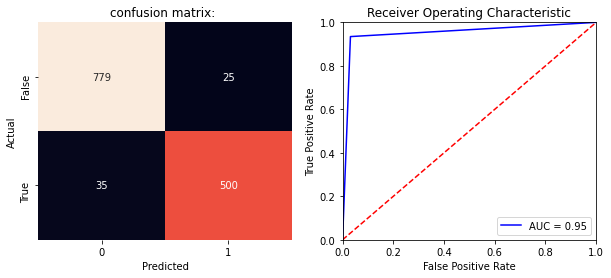

In [ ]:
plt.figure(figsize=(10, 4))
plt.subplot(121)
sns.heatmap(pd.crosstab(y_test, (bst.predict(xgb.DMatrix(x_test.values)).argmax(axis=1)),
                        rownames=['Actual'], colnames=['Predicted']), annot=True, cbar=False, fmt='d')
plt.title('confusion matrix: ')
plt.subplot(122)
fpr, tpr, threshold = metrics.roc_curve(y_test, bst.predict(xgb.DMatrix(x_test.values)).argmax(axis=1))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % metrics.auc(fpr, tpr))
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig('confu_roc_xgboost')
plt.show()

In [ ]:
#Check Accuracy of Spam Detection in Train and Test Set
print('Simple Decision Trees')
print("Simple Decision Trees: Accuracy, Testing Set \t : {:.2%}".format(metrics.accuracy_score(y_test,  model_tree.predict(x_test))))
print("Simple Decision Trees: precision, Testing Set \t : {:.2%}".format(metrics.precision_score(y_test,  model_tree.predict(x_test))))
print("Simple Decision Trees: Recall, Testing Set \t : {:.2%}".format(metrics.recall_score(y_test,  model_tree.predict(x_test))))
print('Bagging vote')
print("Bagging vote: Accuracy, Testing Set \t : {:.2%}".format(metrics.accuracy_score(y_test,  get_prediction(predictions_test, count=-1))))
print("Bagging vote: precision, Testing Set \t : {:.2%}".format(metrics.precision_score(y_test,  get_prediction(predictions_test, count=-1))))
print("Bagging vote: Recall, Testing Set \t : {:.2%}".format(metrics.recall_score(y_test,  get_prediction(predictions_test, count=-1))))
print('Random Forest Deep')
print("Random Forest Deep: Accuracy, Testing Set \t : {:.2%}".format(metrics.accuracy_score(y_test,  rfc_2.predict(x_test))))
print("Random Forest Deep: precision, Testing Set \t : {:.2%}".format(metrics.precision_score(y_test,  rfc_2.predict(x_test))))
print("Random Forest Deep: Recall, Testing Set \t : {:.2%}".format(metrics.recall_score(y_test,  rfc_2.predict(x_test))))
print('AdaBoost')
print("AdaBoost: Accuracy, Testing Set \t : {:.2%}".format(metrics.accuracy_score(y_test,  adaboost.predict(x_test))))
print("AdaBoost: precision, Testing Set \t : {:.2%}".format(metrics.precision_score(y_test,  adaboost.predict(x_test))))
print("AdaBoost: Recall, Testing Set \t : {:.2%}".format(metrics.recall_score(y_test,  adaboost.predict(x_test))))

print('xgboost')
print("Xgboost: Accuracy, Testing Set \t : {:.2%}".format(metrics.accuracy_score(((y_test)*1),  bst.predict(xgb.DMatrix(x_test.values)).argmax(axis=1))))
print("Xgboost: precision, Testing Set \t : {:.2%}".format(metrics.precision_score(((y_test)*1),  bst.predict(xgb.DMatrix(x_test.values)).argmax(axis=1))))
print("Xgboost: Recall, Testing Set \t : {:.2%}".format(metrics.recall_score(((y_test)*1),  bst.predict(xgb.DMatrix(x_test.values)).argmax(axis=1))))

Simple Decision Trees
Simple Decision Trees: Accuracy, Testing Set 	 : 90.81%
Simple Decision Trees: precision, Testing Set 	 : 90.87%
Simple Decision Trees: Recall, Testing Set 	 : 85.61%
Bagging vote
Bagging vote: Accuracy, Testing Set 	 : 92.01%
Bagging vote: precision, Testing Set 	 : 94.58%
Bagging vote: Recall, Testing Set 	 : 84.86%
Random Forest Deep
Random Forest Deep: Accuracy, Testing Set 	 : 95.37%
Random Forest Deep: precision, Testing Set 	 : 96.10%
Random Forest Deep: Recall, Testing Set 	 : 92.15%
AdaBoost
AdaBoost: Accuracy, Testing Set 	 : 94.62%
AdaBoost: precision, Testing Set 	 : 95.13%
AdaBoost: Recall, Testing Set 	 : 91.21%
xgboost
Xgboost: Accuracy, Testing Set 	 : 95.52%
Xgboost: precision, Testing Set 	 : 95.24%
Xgboost: Recall, Testing Set 	 : 93.46%


Le xgboost surpasse tous les autres modèles en terme d'accuracy et de racall.  

## Light Gradient Boosting Machine

In [ ]:
! pip install lightgbm
import lightgbm as lgb

In [ ]:
def objective(trial): 


  params = {
          'num_leaves': trial.suggest_int('num_leaves', 32, 512),
          'boosting_type': 'gbdt',
          'max_bin': trial.suggest_int('max_bin', 700, 900),
          'objective': 'binary',
          'metric': 'logloss',
          'max_depth': trial.suggest_int('max_depth', 4, 16),
          'min_child_weight': trial.suggest_int('min_child_weight', 1, 16),
          'feature_fraction': trial.suggest_uniform('feature_fraction', 0.4, 1.0),
          'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.4, 1.0),
          'bagging_freq': trial.suggest_int('bagging_freq', 1, 8),
          'min_child_samples': trial.suggest_int('min_child_samples', 4, 80),
          'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 1.0),
          'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 1.0),
          }

  model = lgb.train(params, lgb_train, num_boost_round=1300, valid_sets=[lgb_train, lgb_test], valid_names=['lgb_train', 'lgb_test'],
                    early_stopping_rounds=10, 
                    verbose_eval=200)
  
  val_pred = model.predict(x_test)
  print(val_pred)
  score = accuracy_score(((y_test)*1), val_pred.argmax(axis=1))
  print(f"AUC = {score}")

  return score

In [ ]:

lgb_train = lgb.Dataset(x_train, label = y_train) 
lgb_test = lgb.Dataset(x_test, label = y_test, reference=lgb_train)

# Bayesian optimization
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=5)